In [1]:
from zipfile import ZipFile 
  
# loading the temp.zip and creating a zip object 
with ZipFile("fashion/FACAD/image.zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall( 
        path="fashion/FACAD") 

In [2]:
import os

def count_files_in_directory(directory):
    try:
        # Lấy danh sách các file và thư mục con trong thư mục
        files_and_dirs = os.listdir(directory)

        # Đếm số file trong danh sách (loại trừ thư mục)
        num_files = sum(os.path.isfile(os.path.join(directory, item)) for item in files_and_dirs)

        return num_files
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0

# Sử dụng hàm
directory_path = 'fashion/FACAD/image'  # Thay thế bằng đường dẫn thực tế
print(f"Number of files in '{directory_path}': {count_files_in_directory(directory_path)}")


Number of files in 'fashion/FACAD/image': 103886


In [3]:
pip install matplotlib scikit-learn evaluate rouge_score

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 97.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 99.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 113.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 k

# **Import Libraries**

In [1]:
import os
import datasets
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm
import multiprocessing as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from nltk.translate.bleu_score import corpus_bleu
from torchvision import transforms
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import io, transforms
from torch.utils.data import Dataset, DataLoader, random_split
import json
import pandas as pd
from transformers import Seq2SeqTrainer ,Seq2SeqTrainingArguments
from transformers import VisionEncoderDecoderModel , ViTFeatureExtractor
from transformers import AutoTokenizer ,  GPT2Config , default_data_collator
import warnings
warnings.filterwarnings("ignore")

# **GPU Testing**

In [2]:
if torch.cuda.is_available():    

    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA RTX A5000


# **Defining Hyperparameters**

In [3]:
os.environ["WANDB_DISABLED"] = "true"
class config : 
    ENCODER = "microsoft/beit-base-patch16-224-pt22k-ft22k"
    DECODER = "gpt2"
    TRAIN_BATCH_SIZE = 8
    VAL_BATCH_SIZE = 8
    VAL_EPOCHS = 1
    LR = 5e-5
    SEED = 42
    MAX_LEN = 128
    SUMMARY_LEN = 20
    WEIGHT_DECAY = 0.01
    MEAN = (0.485, 0.456, 0.406)
    STD = (0.229, 0.224, 0.225)
    TRAIN_PCT = 0.95
    NUM_WORKERS = mp.cpu_count()
    EPOCHS = 5
    IMG_SIZE = (224,224)
    LABEL_MASK = -100
    TOP_K = 1000
    TOP_P = 0.95

In [4]:
from transformers import VisionEncoderDecoderModel, AutoTokenizer, AutoModel, AutoModelForCausalLM

model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(config.ENCODER, config.DECODER)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model.to(device)

config.json:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.crossattention.c_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.q_attn.bias', 'h.0.crossattention.q_attn.weight', 'h.0.ln_cross_attn.bias', 'h.0.ln_cross_attn.weight', 'h.1.crossattention.c_attn.bias', 'h.1.crossattention.c_attn.weight', 'h.1.crossattention.c_proj.bias', 'h.1.crossattention.c_proj.weight', 'h.1.crossattention.q_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.1.ln_cross_attn.bias', 'h.1.ln_cross_attn.weight', 'h.10.crossattention.c_attn.bias', 'h.10.crossattention.c_attn.weight', 'h.10.crossattention.c_proj.bias', 'h.10.crossattention.c_proj.weight', 'h.10.crossattention.q_attn.bias', 'h.10.crossattention.q_attn.weight', 'h.10.ln_cross_attn.bias', 'h.10.ln_cross_attn.weight', 'h.11.crossattention.c_attn.bias', 'h.11.crossattention.c_attn.weight', 'h.11.crossat

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (i

# **Tokenizer**

In [5]:
# image feature extractor
from transformers import VisionEncoderDecoderModel, AutoTokenizer, AutoFeatureExtractor
feature_extractor = AutoFeatureExtractor.from_pretrained(config.ENCODER)
# text tokenizer
tokenizer = AutoTokenizer.from_pretrained(config.DECODER)

preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [6]:
tokenizer.pad_token = tokenizer.eos_token

model.config.eos_token_id = tokenizer.eos_token_id
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.pad_token_id = tokenizer.pad_token_id

# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size
# set beam search parameters
model.config.eos_token_id = tokenizer.sep_token_id

model.config.max_length = 128
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4


In [7]:
model_name = 'beit-gpt-en_v0'

model_dir = f'./models/{model_name}'
model_output_dir = f'{model_dir}/image-captioning-output'
output_dir = f'{model_dir}/beit-gpt-model'

In [8]:
# model.save_pretrained(output_dir)
# feature_extractor.save_pretrained(output_dir)
# tokenizer.save_pretrained(output_dir)

# **Defining Evalution Matrix**

In [9]:
import nltk
try:
    nltk.data.find("tokenizers/punkt")
except (LookupError, OSError):
    nltk.download("punkt", quiet=True)

In [10]:
import numpy as np
import evaluate
ignore_pad_token_for_loss = True

metric = evaluate.load("rouge")
meteor = evaluate.load('meteor')

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]

    # rougeLSum expects newline after each sentence
    preds = ["\n".join(nltk.sent_tokenize(pred)) for pred in preds]
    labels = ["\n".join(nltk.sent_tokenize(label)) for label in labels]

    return preds, labels

import nltk.translate.bleu_score as bleu

# Thêm hàm tính BLEU scores
def compute_bleu(preds, labels, n):
    bleu_scores = []
    for pred, label in zip(preds, labels):
        pred_tokens = nltk.word_tokenize(pred.lower())
        label_tokens = nltk.word_tokenize(label.lower())
        bleu_score = bleu.sentence_bleu([label_tokens], pred_tokens, weights=[1.0/n]*n)
        bleu_scores.append(bleu_score)
    return bleu_scores


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    if ignore_pad_token_for_loss:
        # Replace -100 in the labels as we can't decode them.
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds,
                                                     decoded_labels)

    # Compute BLEU@1 and BLEU@2
    bleu1_scores = compute_bleu(decoded_preds, decoded_labels, 1)
    bleu2_scores = compute_bleu(decoded_preds, decoded_labels, 2)
    bleu3_scores = compute_bleu(decoded_preds, decoded_labels, 3)
    bleu4_scores = compute_bleu(decoded_preds, decoded_labels, 4)

    # Compute ROUGE scores
    rouge_scores = metric.compute(predictions=decoded_preds,
                                  references=decoded_labels,
                                  use_stemmer=True)
    rouge_scores = {k: round(v * 100, 4) for k, v in rouge_scores.items()}
    
    meteor_scores = meteor.compute(predictions=decoded_preds,
                                  references=decoded_labels,
                                  )

    prediction_lens = [
        np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds
    ]
    gen_len_mean = np.mean(prediction_lens)

    result = {
        "bleu_1": round(np.mean(bleu1_scores) * 100, 4),
        "bleu_2": round(np.mean(bleu2_scores) * 100, 4),
        "bleu_3": round(np.mean(bleu3_scores) * 100, 4),
        "bleu_4": round(np.mean(bleu4_scores) * 100, 4),
        **rouge_scores,
        "meteor": round(meteor_scores['meteor']*100, 4),
        "gen_len": gen_len_mean
    }
    return result


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **Normalization Of Image**

In [11]:
from torchvision import io, transforms
transforms = transforms.Compose(
    [
        transforms.Resize(config.IMG_SIZE), 
        transforms.ToTensor(),
        transforms.Normalize(
            mean=0.5, 
            std=0.5
        )
   ]
)

# **Loading Dataset**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ file CSV
df = pd.read_csv('fashion/FACAD/FACAD.csv')

# Chia dữ liệu thành tập train và tạm thời là tập còn lại (validation + test)
dtrain, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Chia tiếp tập còn lại thành validation và test
dval, dtest = train_test_split(temp_df, test_size=0.5, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print("Train set size:", dtrain.shape)
print("Validation set size:", dval.shape)
print("Test set size:", dtest.shape)


Train set size: (83108, 2)
Validation set size: (10389, 2)
Test set size: (10389, 2)


# **Load Image For Training**

In [17]:
from PIL import Image
import torch

class ImageCapatioingDataset(torch.utils.data.Dataset):
    def __init__(self, df,root_dir,max_target_length, transform = None):
        self.df = df
        self.transform = transform
        self.root_dir = root_dir
        self.max_target_length = max_target_length

    def __getitem__(self, idx):
        image = self.df.image.iloc[idx]
        image_path = os.path.join(self.root_dir , image)
        caption = self.df.caption.iloc[idx]
        model_inputs = dict()
        model_inputs['labels'] = self.tokenization_fn(caption, self.max_target_length)
        model_inputs['pixel_values'] = self.feature_extraction_fn(image_path)
        return model_inputs

    def __len__(self):
        return len(self.df)
    
    # text preprocessing step
    def tokenization_fn(self, caption, max_target_length):
        labels = tokenizer(caption, 
                          padding="max_length", 
                          max_length=max_target_length,
                          truncation=True).input_ids

        return labels
    
    # image preprocessing step
    def feature_extraction_fn(self, image_path):
        image = Image.open(image_path).convert('RGB')

        encoder_inputs = feature_extractor(images=image, return_tensors="np")

        return encoder_inputs.pixel_values[0]


train_dataset = ImageCapatioingDataset(dtrain, root_dir = "fashion/FACAD/image/",max_target_length = 64,transform = transforms)
val_dataset = ImageCapatioingDataset(dval, root_dir = "fashion/FACAD/image/",max_target_length = 64,transform = transforms)
test_dataset = ImageCapatioingDataset(dtest, root_dir = "fashion/FACAD/image/",max_target_length = 64,transform = transforms)


# **Model Initialization**

# **Training**

In [18]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    output_dir="./output",
    num_train_epochs=10,
    save_strategy="no",
    logging_dir="./logs",  # Enable logging
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [19]:
from transformers import Seq2SeqTrainer, default_data_collator

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=default_data_collator,
)

trainer.train()


Epoch,Training Loss,Validation Loss,Bleu 1,Bleu 2,Bleu 3,Bleu 4,Rouge1,Rouge2,Rougel,Rougelsum,Meteor,Gen Len
1,0.957800,0.819827,20.714100,7.443600,3.602700,2.690700,23.882800,5.627800,18.558300,18.567700,16.513900,24.553181
2,0.661800,0.543728,22.623700,9.678700,6.151600,5.321400,25.582300,8.004100,20.258600,20.267500,18.634100,25.447685
3,0.459800,0.380335,25.211300,12.764600,9.469300,8.719200,27.926100,11.198300,22.930300,22.913500,21.448800,25.781115
4,0.330400,0.275515,29.556200,17.592200,14.370400,13.611200,32.307300,16.084200,27.305200,27.316900,25.985800,25.297719
5,0.235900,0.209072,35.397800,24.442700,21.536900,20.857500,37.864900,23.102000,33.368600,33.369200,32.146400,25.214361
6,0.172500,0.168622,39.675700,29.336500,26.623600,26.009500,42.067900,28.097600,37.820000,37.827200,36.569900,25.048417
7,0.128800,0.143797,43.219900,33.589200,31.034000,30.437900,45.473900,32.436900,41.445800,41.487100,40.353900,25.004620
8,0.104000,0.127880,46.690300,37.550100,35.146400,34.591000,48.794800,36.491200,44.954800,44.954300,43.936400,24.975744
9,0.084700,0.118296,49.171000,40.454000,38.156800,37.624100,51.216000,39.439100,47.551800,47.564100,46.509400,24.864857
10,0.072800,0.114587,50.465900,41.961300,39.700700,39.169600,52.490100,40.977800,48.896600,48.933700,47.879600,24.799114


TrainOutput(global_step=25980, training_loss=0.3635844704185292, metrics={'train_runtime': 30925.9173, 'train_samples_per_second': 26.873, 'train_steps_per_second': 0.84, 'total_flos': 1.4950910322430968e+20, 'train_loss': 0.3635844704185292, 'epoch': 10.0})

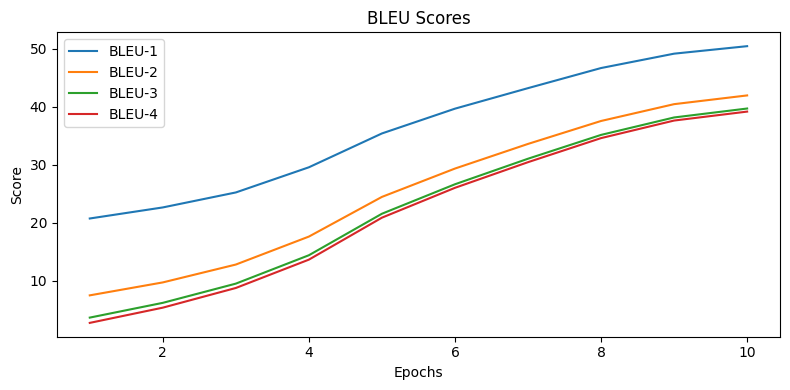

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

log_df = pd.DataFrame(trainer.state.log_history)

# Biểu đồ metric qua các epoch
plt.figure(figsize=(8, 4))
for i in range(1, 5):
    sns.lineplot(data=log_df, x='epoch', y=f'eval_bleu_{i}', label=f'BLEU-{i}')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('BLEU Scores')

plt.tight_layout()
plt.show()


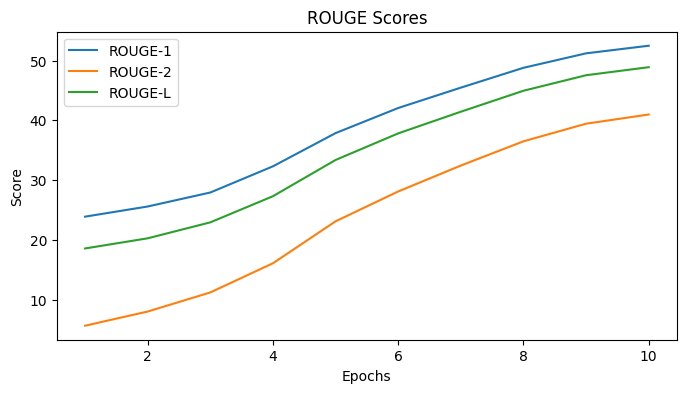

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chuyển đổi log_history thành DataFrame để dễ xử lý
log_df = pd.DataFrame(trainer.state.log_history)

# Biểu đồ ROUGE score qua các epoch
plt.figure(figsize=(8, 4))

# Vẽ đường cho ROUGE score ROUGE-1, ROUGE-2, ROUGE-L, ROUGE-Lsum
sns.lineplot(data=log_df, x='epoch', y='eval_rouge1', label='ROUGE-1')
sns.lineplot(data=log_df, x='epoch', y='eval_rouge2', label='ROUGE-2')
sns.lineplot(data=log_df, x='epoch', y='eval_rougeL', label='ROUGE-L')

plt.title('ROUGE Scores')
plt.xlabel('Epochs')
plt.ylabel('Score')

plt.show()


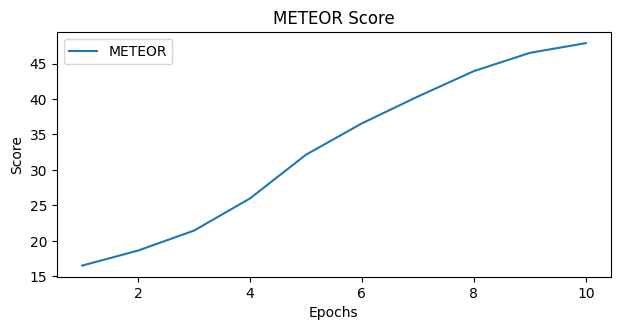

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chuyển đổi log_history thành DataFrame để dễ xử lý
log_df = pd.DataFrame(trainer.state.log_history)

# Biểu đồ metric qua các epoch
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
sns.lineplot(data=log_df, x='epoch', y='eval_meteor', label='METEOR')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('METEOR Score')

plt.tight_layout()
plt.show()

In [25]:
trainer.evaluate(eval_dataset=test_dataset)

{'eval_loss': 0.10935226082801819,
 'eval_bleu_1': 51.0384,
 'eval_bleu_2': 42.6538,
 'eval_bleu_3': 40.4424,
 'eval_bleu_4': 39.9242,
 'eval_rouge1': 52.9873,
 'eval_rouge2': 41.6898,
 'eval_rougeL': 49.4949,
 'eval_rougeLsum': 49.4846,
 'eval_meteor': 48.4997,
 'eval_gen_len': 24.824718452209066,
 'eval_runtime': 1204.8434,
 'eval_samples_per_second': 8.623,
 'eval_steps_per_second': 0.27,
 'epoch': 10.0}

In [26]:
trainer.save_model(model_output_dir)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}


In [27]:
tokenizer.save_pretrained(model_output_dir)

('./models/beit-gpt-en_v0/image-captioning-output/tokenizer_config.json',
 './models/beit-gpt-en_v0/image-captioning-output/special_tokens_map.json',
 './models/beit-gpt-en_v0/image-captioning-output/vocab.json',
 './models/beit-gpt-en_v0/image-captioning-output/merges.txt',
 './models/beit-gpt-en_v0/image-captioning-output/added_tokens.json',
 './models/beit-gpt-en_v0/image-captioning-output/tokenizer.json')

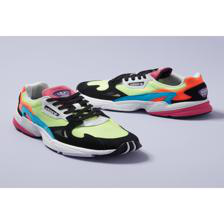

**Actual Caption**: kicky colorful and unapologetically cool these 90 retro sneaker fuse mixed finish and sculpted pattern on a chunky funky flared sole
**Predicted Caption**: kicky colorful and unapologetically cool these 90 retro sneaker fuse mixed finish and sculpted pattern on a chunky funky flared sole


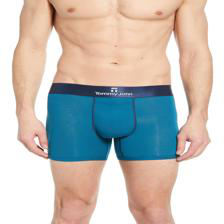

**Actual Caption**: supersoft stretchy micromodal fabric mean performance comfort in easy to wear trunk sporting contrast flat stitch seaming
**Predicted Caption**: a soft stretch cotton blend infuses comfort into smart boxer brief topped with a branded elastic waistband


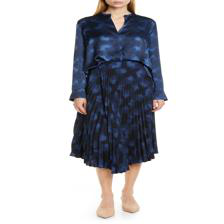

**Actual Caption**: trending tie dye take a dark and wintry turn with the rich indigo tone of this pleated a line skirt with a draped front creating elegant movement
**Predicted Caption**: trending tie dye take a dark and wintry turn with the rich indigo tone of this pleated a line skirt with a draped front creating elegant movement


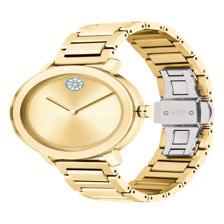

**Actual Caption**: a blend of everyday style and cocktail hour elegance this bold sunray dial feature gleaming link a mirrored bezel and a pav crystal museum dot
**Predicted Caption**: a blend of everyday style and cocktail hour elegance this bold sunray dial feature gleaming link a mirrored bezel and a pav crystal museum dot


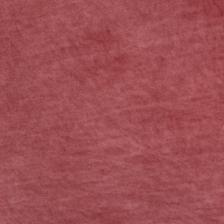

**Actual Caption**: keep your everyday style classic with this relaxed closet staple tee in breezy stretch cotton jersey
**Predicted Caption**: a psychedelia inspired graphic brand the chest of a classic crewneck t tee made from pink burnout jersey for a soft vintage look and feel


In [28]:
import os
import random
import pandas as pd
from PIL import Image
from torchvision.transforms import functional as F
import torch


model = VisionEncoderDecoderModel.from_pretrained(model_output_dir)

tokenizer = AutoTokenizer.from_pretrained(model_output_dir)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 64
num_beams = 4
gen_kwargs = {
    "max_length": max_length,
    "num_beams": num_beams,
    # "num_return_sequences": 3,
}



def load_random_image_and_caption(image_dir, captions_file):
    
    captions_df = pd.read_csv(captions_file)
    captions_df = captions_df.iloc[:5000]

    if 'image' not in captions_df.columns:
        print("Column 'image' not found in the CSV file.")
        return None, None


    random_row = captions_df.sample(n=1)
    random_image_name = random_row['image'].values[0]

    image_path = os.path.join(image_dir, random_image_name)

    if not os.path.isfile(image_path):
        print(f"Image file not found: {image_path}")
        return None, None

    if 'caption' in captions_df.columns:
        actual_caption = random_row['caption'].values[0]
    else:
        actual_caption = None

    return image_path, actual_caption

def predict_step(image_dir, captions_file):

    image_path, actual_caption = load_random_image_and_caption(image_dir, captions_file)

    if image_path is None or actual_caption is None:
        return

    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")
    i_image = i_image.resize((224, 224))

    display(i_image)

    image_tensor = F.to_tensor(i_image).unsqueeze(0)
    image_tensor = image_tensor.to(device)

    output_ids = model.generate(image_tensor, **gen_kwargs)

    pred = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()

    print(f"**Actual Caption**: {actual_caption}")
    print(f"**Predicted Caption**: {pred}")

    
image_directory = 'fashion/FACAD/image'
captions_csv_file = 'fashion/FACAD/FACAD.csv'
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)

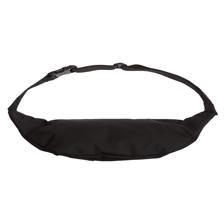

**Actual Caption**: tough cordura nylon mean won t quit construction for this compact belt bag with a utility minded feel
**Predicted Caption**: polished zip hardware with leather trim front a smart belt bag perfectly sized for vacation or a walk around the city


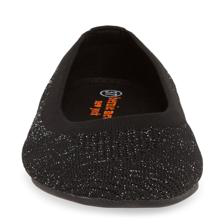

**Actual Caption**: a little bit of sparkle is knit into the mixed stitch that comfortably hug your foot in this sporty ballet flat equipped with a cushy breathable footbed
**Predicted Caption**: a little bit of sparkle is knit into the mixed stitch that comfortably hug your foot in this sporty flat equipped with a cushy breathable footbed


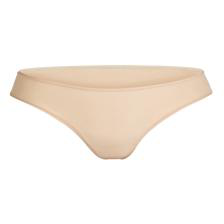

**Actual Caption**: enjoy the flattering look of cheeky brief while retaining the breathability of quick dry fabric with this comfortable option from kim kardashian west s skim
**Predicted Caption**: an alluring v shape and high cut leg put this ribbed bikini bottom in a league of her own


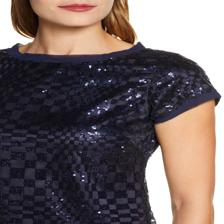

**Actual Caption**: this sequin checked shift is illustrated in an abstract array giving the pattern a mesmerizing warped effect that beguiles a it bemuses
**Predicted Caption**: this sequin checked shift is illustrated in an abstract array giving the pattern a mesmerizing warped effect that beguiles a it bemuses


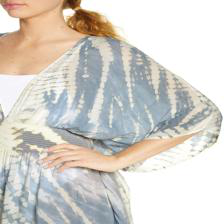

**Actual Caption**: the smocked waistband of this breezy cover up will sit comfortably at your waist while walking along the beach or hanging by the pool
**Predicted Caption**: the smocked waistband of this breezy cover up will sit comfortably at your waist while walking along the beach or hanging by the pool


In [29]:
import os
import random
import pandas as pd
from PIL import Image
from torchvision.transforms import functional as F
import torch


model = VisionEncoderDecoderModel.from_pretrained(model_output_dir)

tokenizer = AutoTokenizer.from_pretrained(model_output_dir)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 64
num_beams = 4
gen_kwargs = {
    "max_length": max_length,
    "num_beams": num_beams,
    # "num_return_sequences": 3,
}



def load_random_image_and_caption(image_dir, captions_file):
    
    captions_df = pd.read_csv(captions_file)
    captions_df = captions_df.iloc[:5000]

    if 'image' not in captions_df.columns:
        print("Column 'image' not found in the CSV file.")
        return None, None


    random_row = captions_df.sample(n=1)
    random_image_name = random_row['image'].values[0]

    image_path = os.path.join(image_dir, random_image_name)

    if not os.path.isfile(image_path):
        print(f"Image file not found: {image_path}")
        return None, None

    if 'caption' in captions_df.columns:
        actual_caption = random_row['caption'].values[0]
    else:
        actual_caption = None

    return image_path, actual_caption

def predict_step(image_dir, captions_file):

    image_path, actual_caption = load_random_image_and_caption(image_dir, captions_file)

    if image_path is None or actual_caption is None:
        return

    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")
    i_image = i_image.resize((224, 224))

    display(i_image)

    image_tensor = F.to_tensor(i_image).unsqueeze(0)
    image_tensor = image_tensor.to(device)

    output_ids = model.generate(image_tensor, **gen_kwargs)

    pred = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()

    print(f"**Actual Caption**: {actual_caption}")
    print(f"**Predicted Caption**: {pred}")

    
image_directory = 'fashion/FACAD/image'
captions_csv_file = 'fashion/FACAD/FACAD.csv'
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)

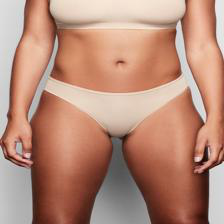

**Actual Caption**: enjoy the flattering look of cheeky brief while retaining the breathability of quick dry fabric with this comfortable option from kim kardashian west s skim
**Predicted Caption**: a completely seamless design offer the smoothest possible fit in these light super stretchy panty


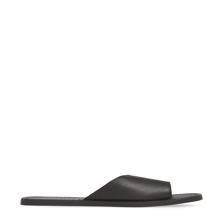

**Actual Caption**: an asymmetrical toe strap update the look of a slide sandal
**Predicted Caption**: an asymmetrical toe strap update the look of a slide sandal


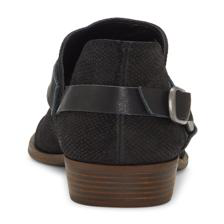

**Actual Caption**: a harness inspired strap cinch the western flair of a leather boot detailed with trend forward reptile embossing
**Predicted Caption**: a harness inspired strap cinch the western flair of a leather boot detailed with trend forward reptile embossing


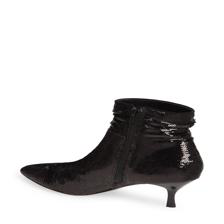

**Actual Caption**: allover sequin add sparkling glamour to a pointy toe boot that s a scene stealing addition to any look
**Predicted Caption**: a softly pointed toe and curvy demi block heel frame a boot crafted from stretch leather that move smartly with you from your day to evening look


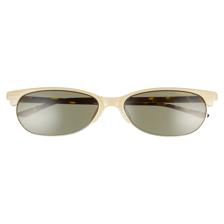

**Actual Caption**: styled with the same upswept cat eye silhouette a when they were released in 1988 these sunglass offer a timeless look and full sun protection
**Predicted Caption**: polarized rectangle lens create a classic silhouette on high performance aviator sunglass designed with polished titanium frame


In [30]:
import os
import random
import pandas as pd
from PIL import Image
from torchvision.transforms import functional as F
import torch


model = VisionEncoderDecoderModel.from_pretrained(model_output_dir)

tokenizer = AutoTokenizer.from_pretrained(model_output_dir)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 64
num_beams = 4
gen_kwargs = {
    "max_length": max_length,
    "num_beams": num_beams,
    # "num_return_sequences": 3,
}



def load_random_image_and_caption(image_dir, captions_file):
    
    captions_df = pd.read_csv(captions_file)
    captions_df = captions_df.iloc[:5000]

    if 'image' not in captions_df.columns:
        print("Column 'image' not found in the CSV file.")
        return None, None


    random_row = captions_df.sample(n=1)
    random_image_name = random_row['image'].values[0]

    image_path = os.path.join(image_dir, random_image_name)

    if not os.path.isfile(image_path):
        print(f"Image file not found: {image_path}")
        return None, None

    if 'caption' in captions_df.columns:
        actual_caption = random_row['caption'].values[0]
    else:
        actual_caption = None

    return image_path, actual_caption

def predict_step(image_dir, captions_file):

    image_path, actual_caption = load_random_image_and_caption(image_dir, captions_file)

    if image_path is None or actual_caption is None:
        return

    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")
    i_image = i_image.resize((224, 224))

    display(i_image)

    image_tensor = F.to_tensor(i_image).unsqueeze(0)
    image_tensor = image_tensor.to(device)

    output_ids = model.generate(image_tensor, **gen_kwargs)

    pred = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()

    print(f"**Actual Caption**: {actual_caption}")
    print(f"**Predicted Caption**: {pred}")

    
image_directory = 'fashion/FACAD/image'
captions_csv_file = 'fashion/FACAD/FACAD.csv'
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)

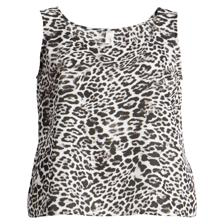

**Actual Caption**: a slightly squared scoop neck add a dash of difference to a staple tank you ll wear all season
**Predicted Caption**: a slightly squared scoop neck add a dash of difference to a staple tank you ll wear all season


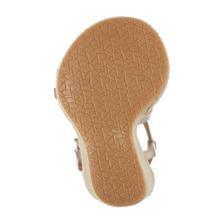

**Actual Caption**: an espadrille wrapped wedge distinguishes a favorite warm weather sandal in a strappy silhouette
**Predicted Caption**: an espadrille wrapped wedge distinguishes a favorite warm weather sandal in a strappy silhouette


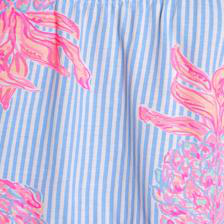

**Actual Caption**: lilly pulitzer s signature illustration enliven this simple striped shift styled with a tiered frill edged hem
**Predicted Caption**: lilly pulitzer s signature illustration enliven this simple striped shift styled with a tiered frill edged hem


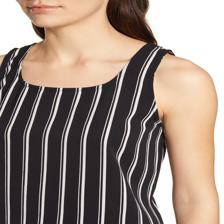

**Actual Caption**: a slightly squared scoop neck add a dash of difference to a staple tank you ll wear all season
**Predicted Caption**: a slightly squared scoop neck add a dash of difference to a staple tank you ll wear all season


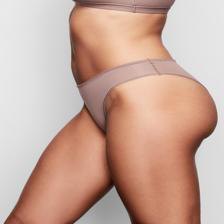

**Actual Caption**: enjoy the flattering look of cheeky brief while retaining the breathability of quick dry fabric with this comfortable option from kim kardashian west s skim
**Predicted Caption**: a throwback ribbed knit add soft stretchy comfort to an everyday thongs finished with flat edge


In [31]:
import os
import random
import pandas as pd
from PIL import Image
from torchvision.transforms import functional as F
import torch


model = VisionEncoderDecoderModel.from_pretrained(model_output_dir)

tokenizer = AutoTokenizer.from_pretrained(model_output_dir)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 64
num_beams = 4
gen_kwargs = {
    "max_length": max_length,
    "num_beams": num_beams,
    # "num_return_sequences": 3,
}



def load_random_image_and_caption(image_dir, captions_file):
    
    captions_df = pd.read_csv(captions_file)
    captions_df = captions_df.iloc[:5000]

    if 'image' not in captions_df.columns:
        print("Column 'image' not found in the CSV file.")
        return None, None


    random_row = captions_df.sample(n=1)
    random_image_name = random_row['image'].values[0]

    image_path = os.path.join(image_dir, random_image_name)

    if not os.path.isfile(image_path):
        print(f"Image file not found: {image_path}")
        return None, None

    if 'caption' in captions_df.columns:
        actual_caption = random_row['caption'].values[0]
    else:
        actual_caption = None

    return image_path, actual_caption

def predict_step(image_dir, captions_file):

    image_path, actual_caption = load_random_image_and_caption(image_dir, captions_file)

    if image_path is None or actual_caption is None:
        return

    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
        i_image = i_image.convert(mode="RGB")
    i_image = i_image.resize((224, 224))

    display(i_image)

    image_tensor = F.to_tensor(i_image).unsqueeze(0)
    image_tensor = image_tensor.to(device)

    output_ids = model.generate(image_tensor, **gen_kwargs)

    pred = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()

    print(f"**Actual Caption**: {actual_caption}")
    print(f"**Predicted Caption**: {pred}")

    
image_directory = 'fashion/FACAD/image'
captions_csv_file = 'fashion/FACAD/FACAD.csv'
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)
predict_step(image_directory, captions_csv_file)